<center><h2> Advanced IoT Data Analysis with Deep Learning Final Exam  </h2></center>

**Name:** Harun Oz<br>
**PID**: 6210436

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.utils import to_categorical

**1. Import the datasets (5 points)**

In [234]:
X_train_signals_path= '/Users/harun/Desktop/DLFinal/UCI HAR Dataset/train/X_train.txt'
X_test_signals_path= '/Users/harun/Desktop/DLFinal/UCI HAR Dataset/test/X_test.txt'
y_train_path ='/Users/harun/Desktop/DLFinal/UCI HAR Dataset/train/y_train.txt'
y_test_path = '/Users/harun/Desktop/DLFinal/UCI HAR Dataset/test/y_test.txt'

X_train = pd.read_csv(X_train_signals_path, header = None, delim_whitespace=True)

X_test = pd.read_csv(X_test_signals_path, header = None, delim_whitespace=True)

y_train = pd.read_csv(y_train_path, header = None, delim_whitespace=True)

y_test = pd.read_csv(y_test_path, header = None, delim_whitespace=True)


from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**2.Build and train a deep  learning neural network  to identify the activity (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) (35 points)**

In [235]:
from keras import optimizers
model = models.Sequential()


model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
#sgd= optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)


model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=16, epochs=10,validation_split=0.33, shuffle= True)
history = model.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=10, verbose=0)


Train on 4925 samples, validate on 2427 samples
Epoch 1/10
4925/4925 [==============================] - 3s 616us/step - loss: 0.8455 - acc: 0.6670 - val_loss: 0.6174 - val_acc: 0.7070
Epoch 2/10
4925/4925 [==============================] - 2s 369us/step - loss: 0.4277 - acc: 0.8290 - val_loss: 0.3935 - val_acc: 0.8871
Epoch 3/10
4925/4925 [==============================] - 1s 302us/step - loss: 0.3123 - acc: 0.8790 - val_loss: 0.3047 - val_acc: 0.9065
Epoch 4/10
4925/4925 [==============================] - 2s 415us/step - loss: 0.2580 - acc: 0.8975 - val_loss: 0.2987 - val_acc: 0.9040
Epoch 5/10
4925/4925 [==============================] - 2s 470us/step - loss: 0.2217 - acc: 0.9149 - val_loss: 0.2866 - val_acc: 0.8768
Epoch 6/10
4925/4925 [==============================] - 2s 348us/step - loss: 0.2017 - acc: 0.9222 - val_loss: 0.2466 - val_acc: 0.9069
Epoch 7/10
4925/4925 [==============================] - 1s 288us/step - loss: 0.1794 - acc: 0.9287 - val_loss: 0.3166 - val_acc: 0.8698


In [236]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


**3. Plot a graph of loss vs the number of epochs (10 points)**

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


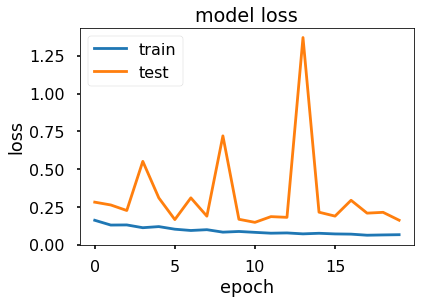

In [237]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline


print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**4. Report the accuracy on the test data (10 points)**

In [238]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 93.79%


**5. Explain your choices of the network and the architecture (20)**

I starting to build my DL architecture by creating sequential model which is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it. After I add three Dense layers to my architecture. Dense is a standard layer type that works for most cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer[1]. I just added three layers to my model because number of layers must be chosen wisely as a very high number may introduce problems like over-fitting and vanishing and exploding gradient problems and a lower number may cause a model to have high bias and low potential model. 
I have 64 nodes in each of my input layers. Increasing the number of nodes in each layer increases model capacity. But for this work I thought 64 is sufficient. 
After I added set 'relu' as my  activation function for my first two layers. An activation function allows models to take into account nonlinear relationships [2].  I choose 'relu' in other words Rectified Linear Activation as my activation function. Although 'relu' is two linear pieces, it has been proven to work well in neural networks.
Lastly, I set the activation function  ‘softmax’ for my last layer. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has a higher probability.



**6. What are the best hyper-parameter values for your network ? Please mention the values of hyper-parameters tested before arriving at the best values. (20)**

I choose SGD in other words Stochastic Gradient Descent in the neural network setting is motivated by the high cost of running back propagation over the full training set. SGD can overcome this cost and still lead to fast convergence. I tried to use also Adam as my optimizer but it did not give a better accuracy. Even though, SGD espcially used in big data applications for reducing the computational burden, achieving faster iterations in trade for a slightly lower convergence rate [3]. SGD gave also good accuracy in this relatively small dataset. 

I first set my SGD's parameters as, learning rate=0.01 with no momentum. After I tried SGD with clip value definaed as in [4],  Gradient value clipping involves clipping the derivatives of the loss function to have a given value if a gradient value is less than a negative threshold or more than the positive threshold.Since I  specify a norm of 0.5, meaning that if a gradient value was less than -0.5, it is set to -0.5 and if it is more than 0.5, then it will be set to 0.5.
Only impact comes in when I played with learning rate values, I changed my learning rate value 0.1 to 0.01 and it strictly increase my accuracy about %2. 

As a result I think due to data set size, playing with SGD parameters  other than learning rate did not give any particular change in accuracy . 


References

[1] https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37?gi=b68bf21c1284

[2] http://deeplearning.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/

[3] https://en.wikipedia.org/wiki/Stochastic_gradient_descent

[4] https://machinelearningmastery.com/how-to-avoid-exploding-gradients-in-neural-networks-with-gradient-clipping/
    